In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_synthetic_epg(length=1000, peaks=5, noise_level=0.1):
    """Generate synthetic electropherogram data"""
    x = torch.linspace(0, 10, length)
    
    # Create peaks (representing STR alleles)
    peaks_pos = torch.rand(peaks) * 9 + 0.5  # Random positions
    peaks_height = torch.rand(peaks) * 3 + 1  # Random heights
    peaks_width = torch.rand(peaks) * 0.3 + 0.1  # Random widths
    
    y = torch.zeros_like(x)
    for pos, height, width in zip(peaks_pos, peaks_height, peaks_width):
        y += height * torch.exp(-((x - pos)/width)**2)
    
    # Add noise and baseline
    y += noise_level * torch.randn(len(x))
    y += 0.1 * torch.sin(x * 2)  # Baseline wobble
    
    return x, y

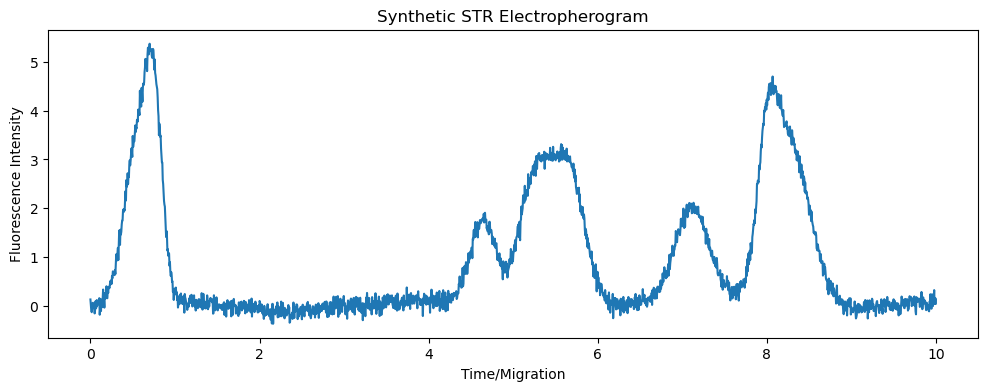

In [3]:
# Generate and plot
x, y = generate_synthetic_epg(length=2000, peaks=8)
plt.figure(figsize=(12, 4))
plt.plot(x.numpy(), y.numpy())
plt.title("Synthetic STR Electropherogram")
plt.xlabel("Time/Migration")
plt.ylabel("Fluorescence Intensity")
plt.show()